In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#202331310 - Muhammad Alfin Hariansyah

In [5]:
# Baca gambar dan konversi ke format RGB dan HSV
img = cv2.imread("nama.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#202331310 - Muhammad Alfin Hariansyah

In [7]:
# Fungsi untuk menghasilkan threshold berdasarkan warna tertentu
def color_threshold(lower_bound, upper_bound):
    mask = cv2.inRange(img_hsv, lower_bound, upper_bound)
    masked_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
    gray_masked = cv2.cvtColor(masked_img, cv2.COLOR_RGB2GRAY)
    _, binary_thresh = cv2.threshold(gray_masked, 10, 255, cv2.THRESH_BINARY)
    return binary_thresh
#202331310 - Muhammad Alfin Hariansyah

In [9]:
# Rentang HSV untuk deteksi warna
# Warna merah butuh dua rentang karena posisinya di dua ujung HSV
red1_lower = np.array([0, 50, 50])
red1_upper = np.array([10, 255, 255])
red2_lower = np.array([160, 50, 50])
red2_upper = np.array([180, 255, 255])

green_lower = np.array([40, 40, 40])
green_upper = np.array([90, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([130, 255, 255])
#202331310 - Muhammad Alfin Hariansyah

In [11]:
# Inisialisasi mask kosong untuk referensi
blank_mask = np.zeros_like(rgb_img[:, :, 0])

# Masking untuk biru
blue_mask = color_threshold(blue_lower, blue_upper)

# Gabungan dua mask untuk merah
red_mask1 = cv2.inRange(img_hsv, red1_lower, red1_upper)
red_mask2 = cv2.inRange(img_hsv, red2_lower, red2_upper)
combined_red_mask = cv2.bitwise_or(red_mask1, red_mask2)
red_masked_img = cv2.bitwise_and(rgb_img, rgb_img, mask=combined_red_mask)
red_gray = cv2.cvtColor(red_masked_img, cv2.COLOR_RGB2GRAY)
_, red_mask = cv2.threshold(red_gray, 10, 255, cv2.THRESH_BINARY)

# Masking untuk hijau
green_mask = color_threshold(green_lower, green_upper)

# Kombinasi hasil
red_blue_mask = cv2.bitwise_or(red_mask, blue_mask)
all_colors_mask = cv2.bitwise_or(red_blue_mask, green_mask)

# Perbaikan area merah dengan morfologi dilasi
kernel = np.ones((3, 3), np.uint8)
dilated_red = cv2.dilate(red_mask, kernel, iterations=1)
red_blue_dilated = cv2.bitwise_or(dilated_red, blue_mask)
final_combined = cv2.bitwise_or(red_blue_dilated, green_mask)

# Susun gambar dan judul
label_list = ['TANPA WARNA', 'WARNA BIRU', 'MERAH + BIRU', 'MERAH + HIJAU + BIRU']
image_list = [blank_mask, blue_mask, red_blue_dilated, final_combined]
#202331310 - Muhammad Alfin Hariansyah

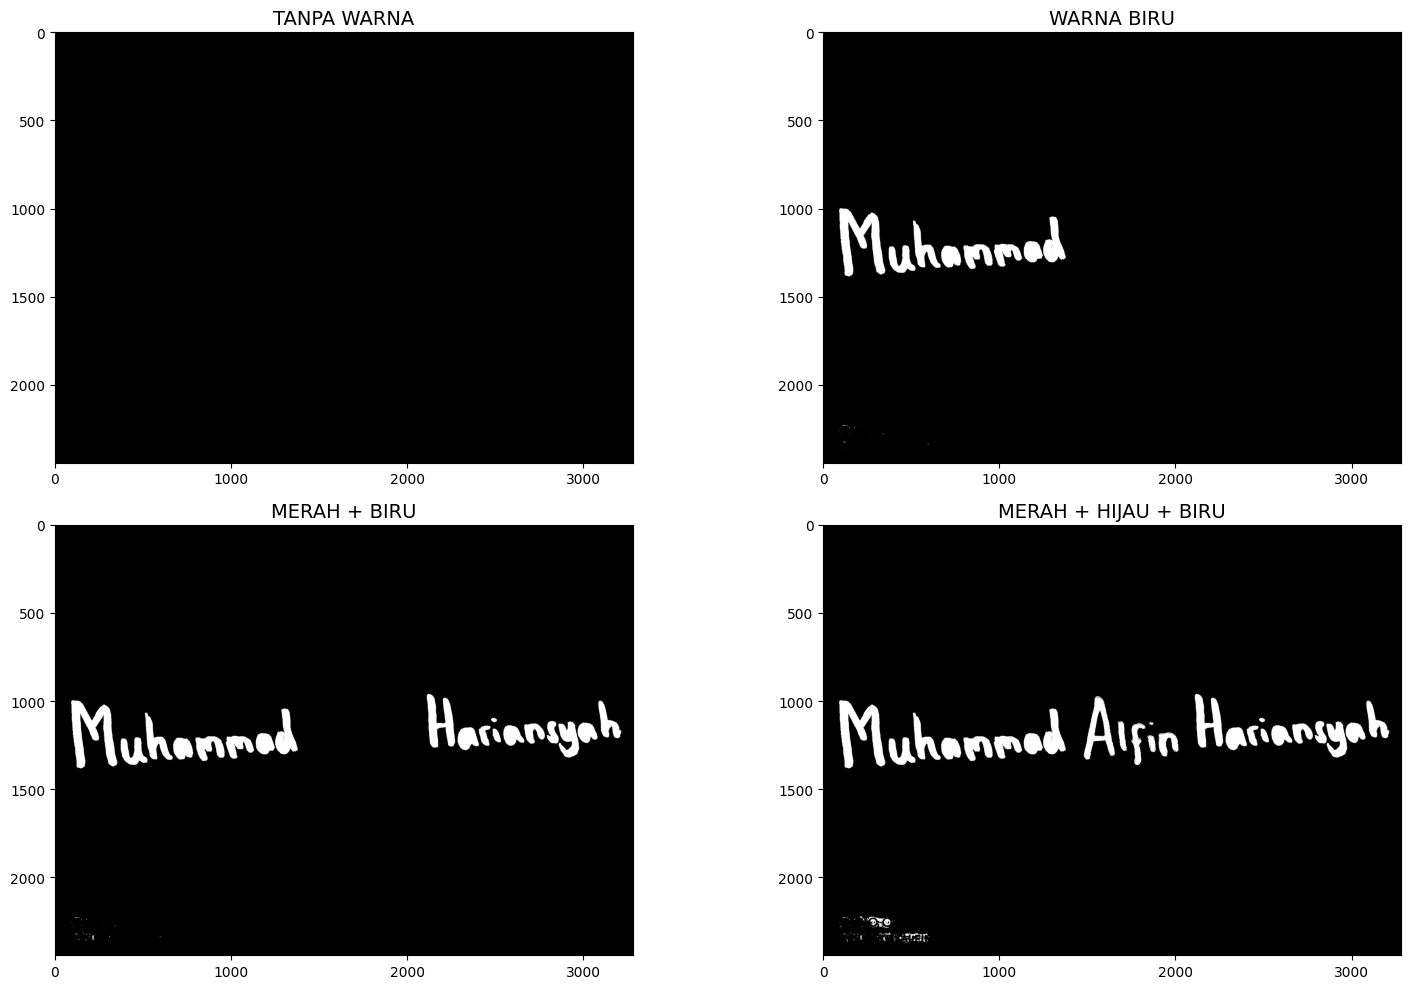

Rentang HSV yang digunakan dalam proses deteksi warna adalah sebagai berikut:
Merah (Rentang Pertama): Lower = [ 0 50 50], Upper = [ 10 255 255]
Merah (Rentang Kedua): Lower = [160  50  50], Upper = [180 255 255]
Hijau: Lower = [40 40 40], Upper = [ 90 255 255]
Biru: Lower = [100  50  50], Upper = [130 255 255]

Catatan: Warna merah menggunakan dua rentang karena karakteristik HSV yang melingkar.
Pemilihan nilai HSV ini mengacu pada standar umum untuk mengenali teks berwarna dalam gambar.


In [13]:
# Tampilkan hasil dengan subplot
plt.figure(figsize=(16, 10))
for idx in range(4):
    plt.subplot(2, 2, idx + 1)
    plt.imshow(image_list[idx], cmap='gray')
    plt.title(label_list[idx], fontsize=14)
    plt.xticks(np.arange(0, img.shape[1], 1000))
    plt.yticks(np.arange(0, img.shape[0], 500))

plt.tight_layout()
plt.show()

# Cetak informasi tentang rentang HSV yang digunakan
print("Rentang HSV yang digunakan dalam proses deteksi warna adalah sebagai berikut:")
print(f"Merah (Rentang Pertama): Lower = {red1_lower}, Upper = {red1_upper}")
print(f"Merah (Rentang Kedua): Lower = {red2_lower}, Upper = {red2_upper}")
print(f"Hijau: Lower = {green_lower}, Upper = {green_upper}")
print(f"Biru: Lower = {blue_lower}, Upper = {blue_upper}")
print("\nCatatan: Warna merah menggunakan dua rentang karena karakteristik HSV yang melingkar.")
print("Pemilihan nilai HSV ini mengacu pada standar umum untuk mengenali teks berwarna dalam gambar.")